In [1]:
import datetime
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def get_variable(domain='atm',var='TREFHT',h='h0',runname='COUP0000_PI_SOM'):
    #fpath = '/glade/scratch/czarakas/archive/CoupledPPE/coupled_simulations/'+runname+'/'+domain+'/proc/tseries/'
    fpath = '/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/'+runname+'/'+domain+'/proc/tseries/'
    fname = fpath+'*'+h+'*.'+var+'*.nc'
    #print(fname)
    ds = xr.open_mfdataset(fname, combine='by_coords')
    return ds

In [5]:
ds1=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/atm/hist/COUP0000_PI_SOM.cam.h0.0093-01.nc')
ds2=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/hist/COUP0000_PI_SOM.clm2.h1.0089-02-01-00000.nc')


# Calculate area weights

In [6]:
#Atmosphere weights
weight_factor2 = ds1.gw / ds1.gw.mean(dim='lat')

#Land weights
land_area=ds2.area*ds2.landfrac
landweights = land_area/land_area.sum(dim=['lat','lon'])

#Land weights
def land_weights_region(minlat=-100,maxlat=100,ds_lnd=ds2):
    land_area=ds_lnd.area*ds_lnd.landfrac
    land_area=land_area.where(land_area.lat>=minlat).where(land_area.lat<=maxlat)
    landweights = land_area/land_area.sum(dim=['lat','lon'])
    return landweights

In [7]:
def global_avg_atm(ds, var):
    #coslat = np.cos(np.deg2rad(ds.lat))
    #atm_weights = coslat / coslat.mean(dim='lat') 
    
    atm_weights = weight_factor2 #weight_factor2/weight_factor2.mean(dim='lat') 
    
    return (ds[var]*atm_weights).mean(dim=['lat','lon'])

# check single simulation


In [61]:
ds_check=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/COUP0005_PI_SOM_v02/lnd/proc/tseries/'+
                         'COUP0005_PI_SOM_v02.clm2.h0.timeseries.HTOP.nc')


In [62]:
time=ds_check['time.year']+(ds_check['time.month']-1)/12
delta=(time.values[1:]-time.values[0:-1])
for d in delta:
    if d>0.083334:
        print(d)
    elif d<0.083332:
        print(d)
    #else:
    #    print('ok')

In [63]:
#ilat = 70
#ilon=100
ilat=45
ilon=120
#ilat=85
#ilon=115

In [64]:
for 

SyntaxError: invalid syntax (<ipython-input-64-eaf083cb72bb>, line 1)

(40.0, 190.0)

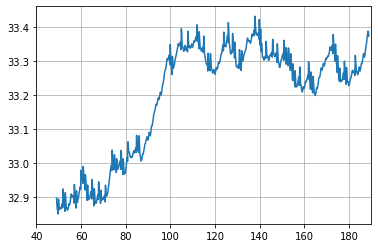

In [65]:
time=ds_check['time.year']+(ds_check['time.month']-1)/12
plt.plot(time, ds_check.HTOP[:,ilat,ilon])
plt.grid()
plt.xlim([40,190])

In [66]:
ilat=85
ilon=115
plt.plot(time[1100:1500], ds_check.TOTVEGC[1100:1500,ilat,ilon])
plt.grid()

AttributeError: 'Dataset' object has no attribute 'TOTVEGC'

In [24]:
ds_check.EFLX_LH_TOT[:,ilat,ilon]

<xarray.DataArray 'EFLX_LH_TOT' (time: 1680)>
array([104.22619, 101.81141, 114.49714, ...,  96.28668, 106.75654, 104.79847],
      dtype=float32)
Coordinates:
  * time     (time) object 0049-01-16 12:00:00 ... 0188-12-16 12:00:00
    lon      float32 300.0
    lat      float32 -4.737
Attributes:
    long_name:     total latent heat flux [+ to atm]
    units:         W/m^2
    cell_methods:  time: mean

# Check multiple simulations

In [8]:
sim_names=['COUP0000_PI_SOM',
           'COUP0001_PI_SOM_v02','COUP0003_PI_SOM_v02','COUP0004_PI_SOM_v02',
           'COUP0005_PI_SOM_v02','COUP0006_PI_SOM_v02','COUP0007_PI_SOM_v02','COUP0008_PI_SOM_v02',
           'COUP0009_PI_SOM_v02','COUP0010_PI_SOM_v02','COUP0011_PI_SOM_v02','COUP0012_PI_SOM_v02',
           'COUP0013_PI_SOM_v02','COUP0014_PI_SOM_v02','COUP0015_PI_SOM_v02','COUP0016_PI_SOM_v02',
           'COUP0017_PI_SOM_v02','COUP0018_PI_SOM_v02','COUP0019_PI_SOM_v02','COUP0020_PI_SOM_v02',
           'COUP0021_PI_SOM_v02','COUP0022_PI_SOM_v02','COUP0023_PI_SOM_v02','COUP0024_PI_SOM_v02',
           'COUP0025_PI_SOM_v02','COUP0026_PI_SOM_v02','COUP0027_PI_SOM_v02','COUP0028_PI_SOM_v02',
           'COUP0029_PI_SOM_v02','COUP0030_PI_SOM_v02','COUP0031_PI_SOM_v02','COUP0032_PI_SOM_v02',
           'COUP0033_PI_SOM_v02','COUP0034_PI_SOM_v02','COUP0035_PI_SOM_v02','COUP0036_PI_SOM_v02',
           'COUP0037_PI_SOM_v02']

In [9]:
print(np.size(sim_names))

37


In [12]:
for sim_name in sim_names:
    ds=get_variable(domain='lnd',var='GPP',h='h0',runname=sim_name)
    yr_delta=(ds['time.year'].values[-1])-(ds['time.year'].values[0])+1
    yrs_output=np.size(ds['time'])/12
    print(sim_name)
    if yrs_output<140:
        print('!!!!!!!!!!!!!!!Years of Output -- TOO FEW!: '+str(yrs_output))
    elif yrs_output>140:
        print('!!!!!!!!!!!!!!!Years of Output -- TOO MANY!: '+str(yrs_output))
    else:
        print('Years of Output: '+str(yrs_output))
    print('First-Last Year: '+str(yr_delta))
    print('First Year:      '+str(ds['time.year'].values[0]))
    print('Last Year:       '+str(ds['time.year'].values[-1]))
    print('--------------')

COUP0000_PI_SOM
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0001_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0003_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0004_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0005_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0006_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0007_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0008_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0009_PI_SOM_v02
Years of Output: 140.0
F

In [14]:
for sim_name in sim_names:
    ds=get_variable(domain='atm',var='TREFHT',h='h0',runname=sim_name)
    yr_delta=(ds['time.year'].values[-1])-(ds['time.year'].values[0])+1
    yrs_output=np.size(ds['time'])/12
    print(sim_name)
    if yrs_output<140:
        print('!!!!!!!!!!!!!!!Years of Output -- TOO FEW!: '+str(yrs_output))
    elif yrs_output>140:
        print('!!!!!!!!!!!!!!!Years of Output -- TOO MANY!: '+str(yrs_output))
    else:
        print('Years of Output: '+str(yrs_output))
    print('First-Last Year: '+str(yr_delta))
    print('First Year:      '+str(ds['time.year'].values[0]))
    print('Last Year:       '+str(ds['time.year'].values[-1]))
    print('--------------')

COUP0000_PI_SOM
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0001_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0003_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0004_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0005_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0006_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0007_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0008_PI_SOM_v02
Years of Output: 140.0
First-Last Year: 140
First Year:      49
Last Year:       188
--------------
COUP0009_PI_SOM_v02
Years of Output: 140.0
F

In [84]:
ds_test=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/COUP0000_PI_SOM/lnd/hist/COUP0000_PI_SOM.clm2.h0.0129-02-01-00000.nc')
ds_test2=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/COUP0000_PI_SOM/lnd/hist/COUP0000_PI_SOM.clm2.h0.0139-02-01-00000.nc')


In [90]:
ds_test.time[100:]

<xarray.DataArray 'time' (time: 8)>
array([cftime.DatetimeNoLeap(137, 6, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(137, 7, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(137, 8, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(137, 9, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(137, 10, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(137, 11, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(137, 12, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(138, 1, 1, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0137-06-01 00:00:00 ... 0138-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bounds

In [87]:
ds_test2.time[0]

<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(139, 2, 1, 0, 0, 0, 0), dtype=object)
Coordinates:
    time     object 0139-02-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bounds

In [7]:
for sim_name in sim_names:
    print(sim_name)
    ds=get_variable(domain='lnd',var='GPP',h='h0',runname=sim_name)
    time=ds['time.year']+(ds['time.month']-1)/12
    delta=(time.values[1:]-time.values[0:-1])
    for i,d in enumerate(delta):
        if d>0.083334:
            print('!!!!!!!!!!!!!!!!!!!!!!!!!')
            print(d)
            print(ds.time.values[i+1])
            print(ds.time.values[i])
        elif d<0.083332:
            print('!!!!!!!!!!!!!!!!!!!!!!!!!')
            print(d)
            print(ds.time.values[i+1])
            print(ds.time.values[i])
    print('-------------------')

COUP0000_PI_SOM
-------------------
COUP0001_PI_SOM_v02
-------------------
COUP0003_PI_SOM_v02
-------------------
COUP0004_PI_SOM_v02
-------------------
COUP0005_PI_SOM_v02
-------------------
COUP0006_PI_SOM_v02
-------------------
COUP0007_PI_SOM_v02
-------------------
COUP0008_PI_SOM_v02
-------------------
COUP0009_PI_SOM_v02
-------------------
COUP0010_PI_SOM_v02
-------------------
COUP0011_PI_SOM_v02
-------------------
COUP0012_PI_SOM_v02
-------------------
COUP0013_PI_SOM_v02
-------------------
COUP0014_PI_SOM_v02
-------------------
COUP0015_PI_SOM_v02
-------------------
COUP0016_PI_SOM_v02
-------------------
COUP0017_PI_SOM_v02
-------------------
COUP0018_PI_SOM_v02
-------------------
COUP0019_PI_SOM_v02
-------------------
COUP0020_PI_SOM_v02
-------------------
COUP0021_PI_SOM_v02
-------------------
COUP0022_PI_SOM_v02
-------------------
COUP0023_PI_SOM_v02
-------------------
COUP0024_PI_SOM_v02
-------------------
COUP0025_PI_SOM_v02
-------------------
COUP

In [7]:
for sim_name in sim_names:
    ds=get_variable(domain='lnd',var='EFLX_LH_TOT',h='h0',runname=sim_name)
    print(sim_name)
    years=ds['time.year'][1:].values
    for i,thisyear in enumerate(years):
        #print(i)
        lastyear=ds['time.year'][0:-1].values[i]
        diff=thisyear-lastyear
        if diff>1:
            print(lastyear)
            print(thisyear)

COUP0000_PI_SOM
COUP0001_PI_SOM_v02
149
154
COUP0003_PI_SOM_v02
COUP0004_PI_SOM_v02
149
154
COUP0005_PI_SOM_v02


KeyboardInterrupt: 

In [45]:
ds_lnd=get_variable(domain='lnd',var='TLAI',h='h0',runname='COUP0000_1850spinup_SOM_v02')

In [9]:
# Compare new files to existing files
fpath_existing='/glade/campaign/cgd/tss/czarakas/'
fpath_new='/glade/scratch/czarakas/archive/'
fname='coupled_DEFmedslope_1xCO2_05.clm2.h0.0155-02-01-00000.nc'
ds_existing=xr.open_dataset(fpath_existing+'coupled_DEFmedslope_1xCO2_all'+'/lnd/hist/'+fname)
ds_new=xr.open_dataset(fpath_new+'coupled_DEFmedslope_1xCO2_05'+'/lnd/hist/'+fname)
var='GPP'

FileNotFoundError: [Errno 2] No such file or directory: b'/glade/campaign/cgd/tss/czarakas/coupled_DEFmedslope_1xCO2_all/lnd/hist/coupled_DEFmedslope_1xCO2_05.clm2.h0.0155-02-01-00000.nc'

In [11]:
# Compare new files to existing files
# if both files are on archive
fpath_existing='/glade/scratch/czarakas/archive/'
fpath_new='/glade/scratch/czarakas/archive/'
fname='coupled_DEFmedslope_1xCO2_05.clm2.h0.0155-02-01-00000.nc'
ds_existing=xr.open_dataset(fpath_existing+'coupled_DEFmedslope_1xCO2_all'+'/lnd/hist/'+fname)
ds_new=xr.open_dataset(fpath_new+'coupled_DEFmedslope_1xCO2_05'+'/lnd/hist/'+fname)
var='GPP'

In [12]:
print(np.size(ds_existing.time.values)/12)
print(np.size(ds_new.time.values)/12)

6.0
10.0


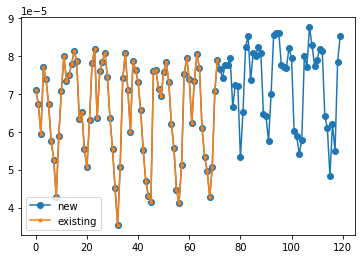

In [13]:
#ilat = 70
#ilon=100
ilat=45
ilon=120
#ilat=85
#ilon=115
plt.plot(ds_new[var][:,ilat,ilon], 'o-',label='new')
plt.plot(ds_existing[var][:,ilat,ilon], '.-',label='existing')
plt.legend()